In [ ]:
# This notebook was built on Google colab and uses data form google drive
# Also the notebook was built using multiple sessions saving the intermediate outputs to avoid overshooting the RAM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_curve, auc

In [ ]:
parent_folder = "/content/drive/MyDrive/AAIC/Projects/Facebook Friend Recommendation /data"

In [ ]:
df_train = pd.read_hdf(parent_folder + '/Features/sample_with_features_4.h5', 'train_df',mode='r')
df_test = pd.read_hdf(parent_folder + '/Features/sample_with_features_4.h5', 'test_df',mode='r')

In [ ]:
df_train.head()

,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_following_s,num_following_d,inter_followers,inter_following,does_follow_back,...,jaccard_following,cosine_followers,cosine_following,page_rank_s,page_rank_d,katz_s,katz_d,weight_out_s,weight_in_d,weight_out_plus_in
0,273084,1505602,1,11,15,6,8,0,0,0,...,0.000000,0.000000,0.000000,2.045290e-06,3.459963e-07,0.000773,0.000756,0.250000,0.377964,0.627964
1,1593259,673140,1,8,3,19,8,0,0,0,...,0.000000,0.000000,0.000000,1.373377e-06,1.886069e-06,0.000762,0.000806,0.500000,0.223607,0.723607
2,355711,1610892,1,9,18,2,1,1,0,1,...,0.000000,0.235702,0.000000,1.394824e-06,2.875504e-07,0.000766,0.000739,0.229416,0.577350,0.806766
3,80115,1473881,1,3,55,83,99,1,12,0,...,0.084507,0.063372,0.162623,1.827472e-07,8.809712e-07,0.000745,0.001098,0.133631,0.109109,0.242740
4,336918,226190,1,14,16,7,5,0,0,1,...,0.000000,0.000000,0.000000,1.198466e-06,5.000005e-07,0.000785,0.000758,0.242536,0.353553,0.596089


In [ ]:
y_train = df_train['indicator_link']
y_test = df_test['indicator_link']

In [ ]:
df_train.drop(columns=['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_test.drop(columns=['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [ ]:
estimators = [10,50,100,200,500]
train_scores = []
test_scores = []

for i in tqdm(estimators):
    clf = RandomForestClassifier(max_depth=5,
                             max_features='auto',
                             min_samples_leaf=50,
                             min_samples_split=100,
                             n_estimators=i,
                             n_jobs=-1,
                             random_state=0)
    clf.fit(df_train, y_train)

    train_score = f1_score(y_train, clf.predict(df_train))
    train_scores.append(train_score)

    test_score = f1_score(y_test, clf.predict(df_test))
    test_scores.append(test_score)

    print(f'Estimators : {i}, Train score : {train_score}, Test score : {test_score}')

 20%|██        | 1/5 [00:00<00:02,  1.38it/s]

Estimators : 10, Train score : 0.9227234042553192, Test score : 0.9046165749656121


 40%|████      | 2/5 [00:02<00:04,  1.44s/it]

Estimators : 50, Train score : 0.9239820833909629, Test score : 0.9197349980889286


 60%|██████    | 3/5 [00:06<00:05,  2.72s/it]

Estimators : 100, Train score : 0.9236893927297888, Test score : 0.9194987255734919


 80%|████████  | 4/5 [00:14<00:04,  4.59s/it]

Estimators : 200, Train score : 0.9242047555300568, Test score : 0.9198566369053931


100%|██████████| 5/5 [00:32<00:00,  6.55s/it]

Estimators : 500, Train score : 0.9242219646787381, Test score : 0.9198378504573721


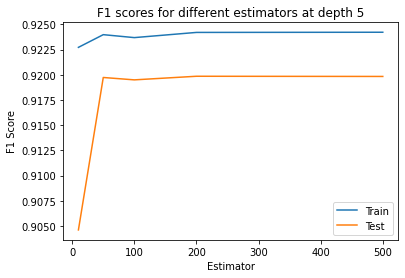

In [ ]:
plt.plot(estimators, train_scores, label="Train")
plt.plot(estimators, test_scores, label="Test")

plt.xlabel("Estimator")
plt.ylabel("F1 Score")
plt.legend()
plt.title("F1 scores for different estimators at depth 5")

plt.show()

In [ ]:
depths = [3,5,10,20,35,50,70,100]
train_scores = []
test_scores = []

for i in tqdm(depths):
    clf = RandomForestClassifier(n_estimators=150,
                             max_depth=i,
                             max_features='auto',
                             min_samples_leaf=50,
                             min_samples_split=100,
                             n_jobs=-1,
                             random_state=0)
    clf.fit(df_train, y_train)

    train_score = f1_score(y_train, clf.predict(df_train))
    train_scores.append(train_score)

    test_score = f1_score(y_test, clf.predict(df_test))
    test_scores.append(test_score)

    print(f'Depth : {i}, Train score : {train_score}, Test score : {test_score}')

 12%|█▎        | 1/8 [00:05<00:39,  5.63s/it]

Depth : 3, Train score : 0.9181084941628809, Test score : 0.91540798425399


 25%|██▌       | 2/8 [00:11<00:33,  5.64s/it]

Depth : 5, Train score : 0.9243147299839511, Test score : 0.919953325554259


 38%|███▊      | 3/8 [00:18<00:32,  6.51s/it]

Depth : 10, Train score : 0.9455906043756171, Test score : 0.9264696616470292


 50%|█████     | 4/8 [00:27<00:28,  7.24s/it]

Depth : 20, Train score : 0.956946139097089, Test score : 0.9276174152958636


 62%|██████▎   | 5/8 [00:37<00:24,  8.20s/it]

Depth : 35, Train score : 0.9570289275683211, Test score : 0.9278027374360046


 75%|███████▌  | 6/8 [00:45<00:16,  8.21s/it]

Depth : 50, Train score : 0.9570289275683211, Test score : 0.9278027374360046


 88%|████████▊ | 7/8 [00:53<00:08,  8.22s/it]

Depth : 70, Train score : 0.9570289275683211, Test score : 0.9278027374360046


100%|██████████| 8/8 [01:01<00:00,  7.73s/it]

Depth : 100, Train score : 0.9570289275683211, Test score : 0.9278027374360046


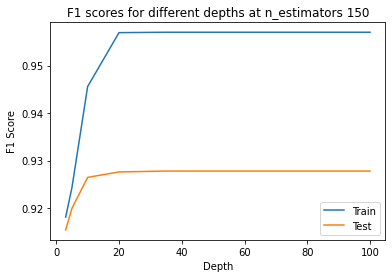

In [ ]:
plt.plot(depths, train_scores, label="Train")
plt.plot(depths, test_scores, label="Test")

plt.xlabel("Depth")
plt.ylabel("F1 Score")
plt.legend()
plt.title("F1 scores for different depths at n_estimators 150")

plt.show()

In [ ]:
param_dist = {"n_estimators":randint(100,150),
              "max_depth": randint(5,15),
              "min_samples_split": randint(100,200),
              "min_samples_leaf": randint(10,60)}

clf = RandomForestClassifier(random_state=0,n_jobs=-1)

rf_random_search = RandomizedSearchCV(clf,
                               param_distributions=param_dist,
                               n_iter=5,
                               cv=10,
                               scoring='f1',
                               random_state=0)

rf_random_search.fit(df_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f347c0c14d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f347c186e10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f347c18d350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f347c0c1410>},
                   random_state=0, scoring='f1')

In [ ]:
pd.DataFrame(rf_random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,4.445677,0.272842,0.107896,0.000580,10,10,167,103,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.945929,...,0.944214,0.950248,0.943797,0.950955,0.942699,0.949541,0.948784,0.946669,0.002804,4
1,5.448051,0.362602,0.117881,0.031126,12,19,183,121,"{'max_depth': 12, 'min_samples_leaf': 19, 'min...",0.949655,...,0.949212,0.953713,0.950422,0.954321,0.948535,0.955058,0.955129,0.951834,0.002398,2
2,3.762863,0.047206,0.107561,0.000341,7,46,187,106,"{'max_depth': 7, 'min_samples_leaf': 46, 'min_...",0.927898,...,0.930399,0.928579,0.926602,0.932883,0.926616,0.933235,0.929425,0.929550,0.002261,5
3,4.659053,0.562410,0.107329,0.000178,13,34,112,101,"{'max_depth': 13, 'min_samples_leaf': 34, 'min...",0.951872,...,0.951117,0.955331,0.949726,0.956495,0.950511,0.957536,0.954242,0.953173,0.002496,1
4,6.256630,0.535089,0.178269,0.046393,11,49,187,146,"{'max_depth': 11, 'min_samples_leaf': 49, 'min...",0.944744,...,0.945974,0.949648,0.946746,0.950538,0.942935,0.949188,0.952184,0.947608,0.002659,3


In [ ]:
print('Mean test scores : ', rf_random_search.cv_results_['mean_test_score'])

Mean test scores :  [0.94666854 0.9518343  0.92955005 0.95317278 0.94760802]


In [ ]:
best_clf = rf_random_search.best_estimator_
best_clf

RandomForestClassifier(max_depth=13, min_samples_leaf=34, min_samples_split=112,
                       n_estimators=101, n_jobs=-1, random_state=0)

In [ ]:
best_clf.fit(df_train, y_train)
y_train_pred = best_clf.predict(df_train)
y_test_pred = best_clf.predict(df_test)

In [ ]:
print('Train f1 score : ', f1_score(y_train, y_train_pred))
print('Test f1 score : ', f1_score(y_test, y_test_pred))

Train f1 score :  0.9551407249028597
Test f1 score :  0.9283680817215105


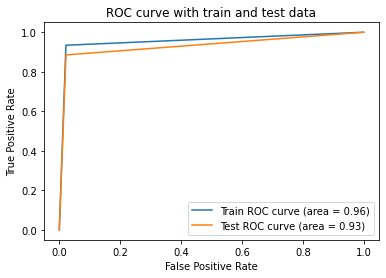

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Train ROC curve (area = {auc_sc:.2f})')

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Test ROC curve (area = {auc_sc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve with train and test data')

plt.show()

In [ ]:
df_train.columns

Index(['num_followers_s', 'num_followers_d', 'num_following_s',
       'num_following_d', 'inter_followers', 'inter_following',
       'does_follow_back', 'shortest_path', 'same_wcc_com', 'adar_index',
       'jaccard_followers', 'jaccard_following', 'cosine_followers',
       'cosine_following', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'weight_out_s', 'weight_in_d', 'weight_out_plus_in'],
      dtype='object')

In [ ]:
np.set_printoptions(precision=3, suppress=True)
np.array(best_clf.feature_importances_)

array([0.005, 0.036, 0.021, 0.009, 0.076, 0.041, 0.264, 0.092, 0.02 ,
       0.034, 0.062, 0.043, 0.072, 0.038, 0.   , 0.003, 0.006, 0.012,
       0.029, 0.017, 0.12 ])

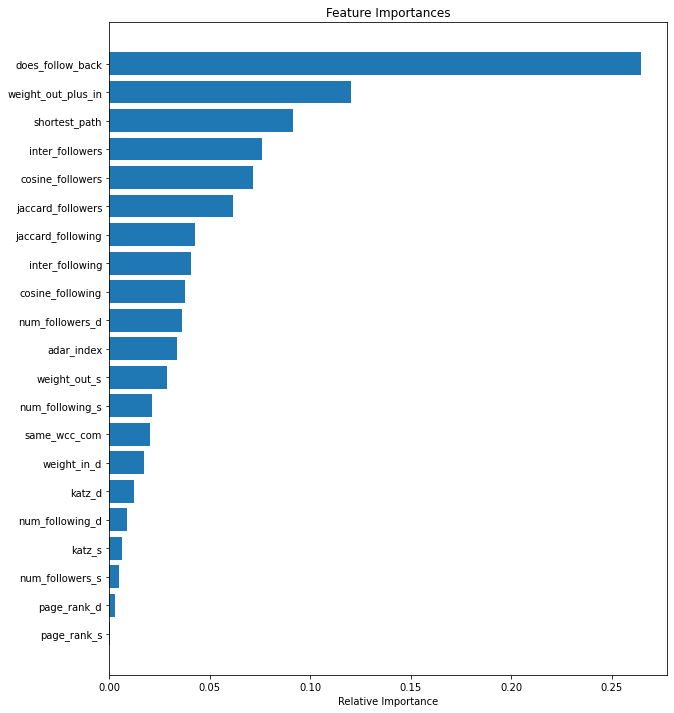

In [ ]:
features = df_train.columns
importances = best_clf.feature_importances_
indices = (np.argsort(importances))[-25:]


plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()